# Trabajo Final MCC616

## Descripción: 
#### El presente trabajo identifica cuando el nivel de un manomemanómetro es bajo para ser cambiado.

#### Se tiene como ejemplos de aplicación la medición de presión masivas o en lugares de difícil acceso. 


# Parte 1 - Construcción del modelo

## Importamos las librerías y paquetes de Keras


In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [23]:
from PIL import Image
import matplotlib.pyplot as plt

In [31]:
import gc
import random
import os

In [69]:
from keras.utils.vis_utils import plot_model
import numpy as np

In [2]:
classifier = Sequential()

## Paso 1 - Convolución

In [3]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))



## Paso 2 - Agrupar

In [4]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))


## Agregar una segunda capa convolucional

In [5]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

## Paso 3- Flattening




In [6]:
classifier.add(Flatten())

## Paso 4 - Capa fully connected

In [7]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

## Compilación 

In [8]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Verificación de modelo a emplear:

In [59]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

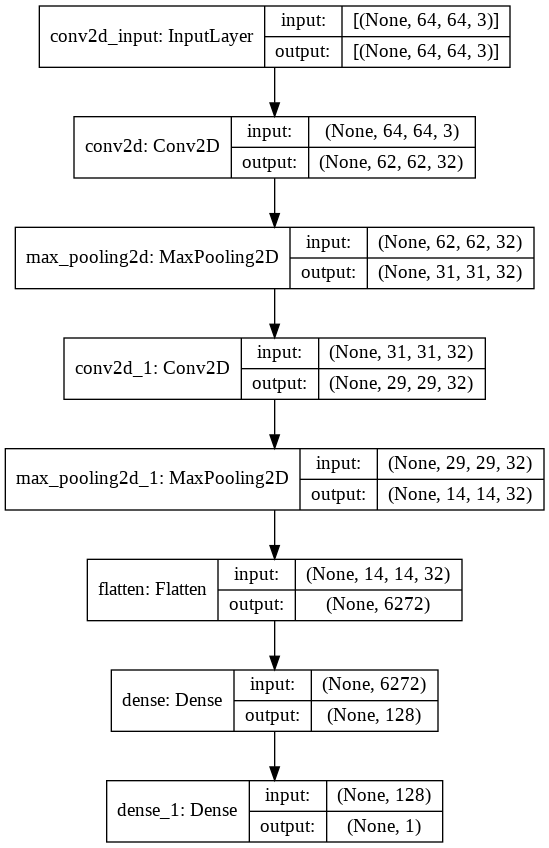

In [62]:

plot_model(classifier, show_shapes=True, show_layer_names=True)

# Dataset creado en drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset

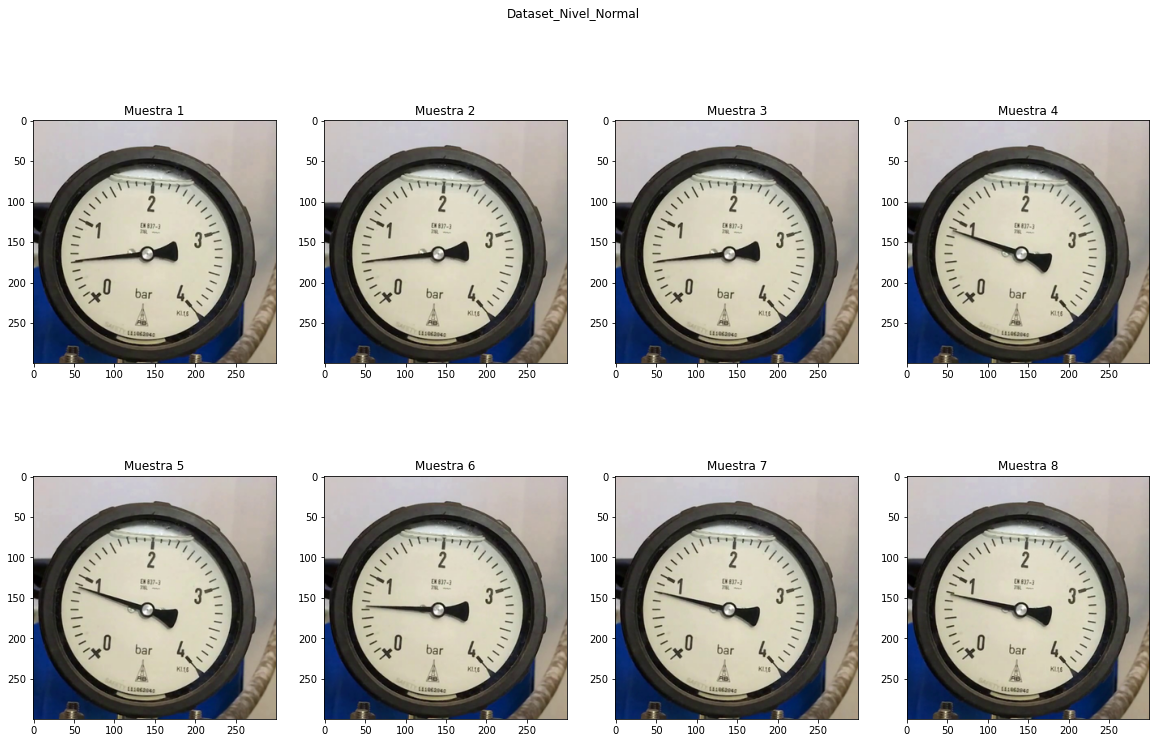

In [49]:
sample_dir = '/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/test_v2/entrenamiento/normal'
fig = plt.figure(figsize=(20, 12))
plt.suptitle('Dataset_Nivel_Normal')

for i, file in enumerate(os.listdir(sample_dir)):
  if i <8:
    img = image.load_img(os.path.join(sample_dir, file),
                         interpolation='box')
    img = img.resize((300, 300), Image.ANTIALIAS)
    img = image.img_to_array(img, dtype='float32')
    img /= 255.0
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title('Muestra ' + str(i+1))

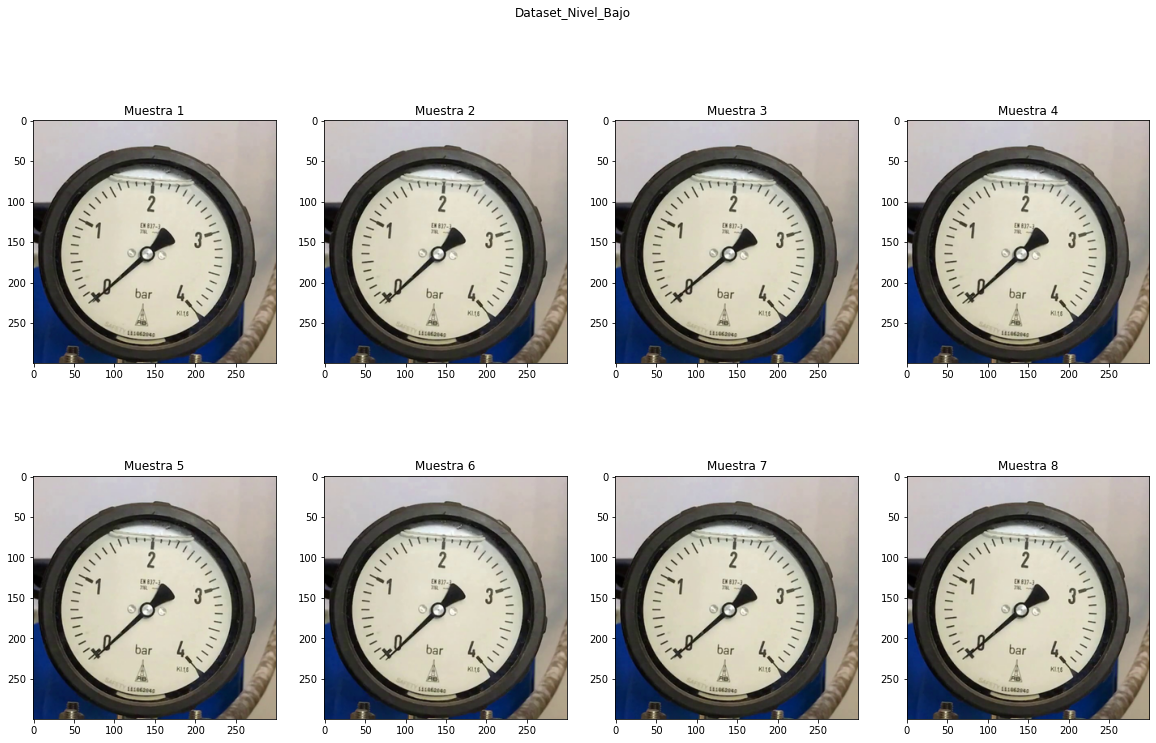

In [48]:
sample_dir = '/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/test_v2/entrenamiento/bajo'
fig = plt.figure(figsize=(20, 12))
plt.suptitle('Dataset_Nivel_Bajo')

for i, file in enumerate(os.listdir(sample_dir)):
  if i <8:
    img = image.load_img(os.path.join(sample_dir, file),
                         interpolation='box')
    img = img.resize((300, 300), Image.ANTIALIAS)
    img = image.img_to_array(img, dtype='float32')
    img /= 255.0
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.title('Muestra ' + str(i+1))

#Parte 2 - Ajustar la CNN a las imágenes

In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/test_v2/entrenamiento',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/test_v2/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 5)

"""classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)
"""

Found 465 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 3s 356ms/step - loss: 0.0132 - accuracy: 0.9934 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 3s 331ms/step - loss: 0.0191 - accuracy: 0.9934 - val_loss: 0.0159 - val_accuracy: 0.9937
Epoch 3/10
10/10 [==============================] - 3s 343ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0093 - val_accuracy: 0.9937
Epoch 4/10
10/10 [==============================] - 3s 342ms/step - loss: 0.0228 - accuracy: 0.9937 - val_loss: 0.0138 - val_accuracy: 0.9937
Epoch 5/10
10/10 [==============================] - 3s 333ms/step - loss: 0.0216 - accuracy: 0.9934 - val_loss: 0.0075 - val_accuracy: 0.9937
Epoch 6/10
10/10 [==============================] - 3s 329ms/step - loss: 0.0118 - accuracy: 0.9934 - val_loss: 0.0076 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 3s 329ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.0067 - val_accuracy: 0.9937
Epoch 

'classifier.fit_generator(training_set,\n                         steps_per_epoch = 8000,\n                         epochs = 25,\n                         validation_data = test_set,\n                         validation_steps = 2000)\n'

In [161]:
model_history = classifier.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 5)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 4s 364ms/step - loss: 0.0153 - accuracy: 0.9937 - val_loss: 9.3101e-04 - val_accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 3s 338ms/step - loss: 0.0065 - accuracy: 0.9969 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 3s 344ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 3s 331ms/step - loss: 0.0062 - accuracy: 0.9967 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 3s 328ms/step - loss: 0.0074 - accuracy: 0.9967 - val_loss: 6.3612e-04 - val_accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 3s 342ms/step - loss: 0.0081 - accuracy: 0.9967 - val_loss: 6.6239e-05 - val_accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 3s 328ms/step - loss: 0.0176 - accuracy: 0.9934 - val_loss: 6.2111e-04 - val_accurac

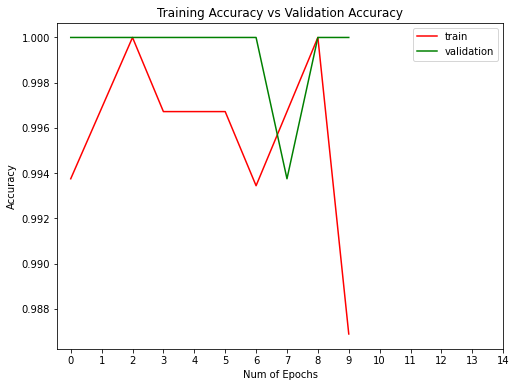

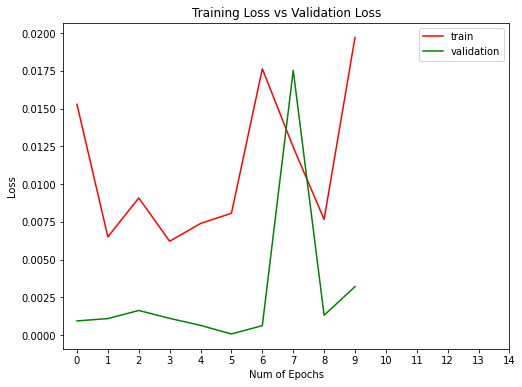

In [162]:
plt.figure(0)  
plt.plot(model_history.history['accuracy'],'r')  
plt.plot(model_history.history['val_accuracy'],'g')  
plt.xticks(np.arange(0, 15, 1.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Accuracy")  
plt.title("Training Accuracy vs Validation Accuracy")  
plt.legend(['train','validation'])

plt.figure(1)  
plt.plot(model_history.history['loss'],'r')  
plt.plot(model_history.history['val_loss'],'g')  
plt.xticks(np.arange(0, 15, 1.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("Loss")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])

"""plt.figure(2)  
#plt.plot(model_history.history['mean_squared_error'],'r')  
#plt.plot(model_history.history['val_mean_squared_error'],'g')  
plt.xticks(np.arange(0, 20, 1.0))  
plt.rcParams['figure.figsize'] = (8, 6)  
plt.xlabel("Num of Epochs")  
plt.ylabel("MSE")  
plt.title("Training Loss vs Validation Loss")  
plt.legend(['train','validation'])
"""
plt.show()

# Predicción del nivel del manomemanómetro 

Normal: cuando aguja indica de 0.5 a más

Bajo: Cuando presion es menor a 0.5 

In [73]:
def ver_imagen(ver_imagen):
  tot = Image.open(ver_imagen)
  tot.size
  tot = tot.resize((300, 300), Image.ANTIALIAS)
  tot.size
  #print(tot)
  plt.imshow(tot)

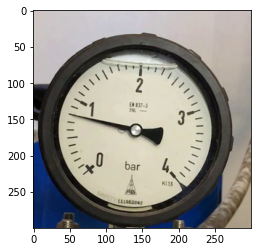

In [107]:
ver_imagen('/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/test_v2/para_predecir/normal_p1.jpg')

In [117]:
#numpy
def prediccion(imangen_pred):
  from keras.preprocessing import image
  test_image = image.load_img(imangen_pred, target_size = (64, 64))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  result = classifier.predict(test_image)
  training_set.class_indices
  if result[0][0] == 1:
      prediction = 'El nivel del manometro es NORMAL'
      print(prediction)
  else:
      prediction = 'El nivel del manometro es BAJO'
      print(prediction)
  tot = Image.open(imangen_pred)
  tot.size
  tot = tot.resize((300, 300), Image.ANTIALIAS)
  tot.size
  #print(tot)
  plt.imshow(tot)

El nivel del manometro es NORMAL


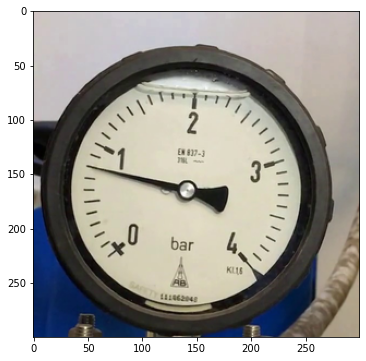

In [163]:
prediccion('/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/test_v2/para_predecir/normal_p1.jpg')

El nivel del manometro es BAJO


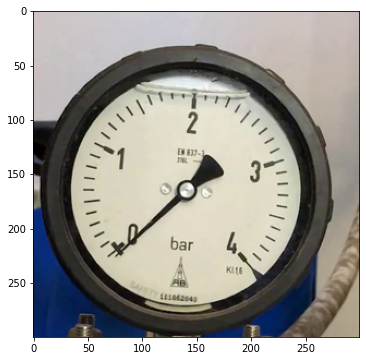

In [164]:
prediccion('/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/test_v2/para_predecir/bajo_p1.jpg')

El nivel del manometro es BAJO


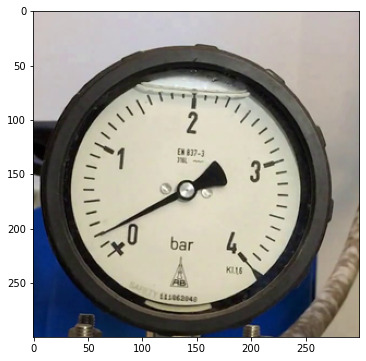

In [165]:
prediccion('/content/drive/MyDrive/Maestria 2 ciclo/Trabajo_imagenes/test_v2/para_predecir/bajo_p2.jpg')